In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

1. DATA EXPLORATION

In [3]:
# Load the data
df = pd.read_csv('dataset.csv')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             247 non-null    object 
 1   Open             247 non-null    float64
 2   High             247 non-null    float64
 3   Low              247 non-null    float64
 4   Close            247 non-null    float64
 5   Shares Traded    247 non-null    int64  
 6   Turnover (₹ Cr)  247 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.6+ KB


In [4]:
# Convert 'Date' column to datetime format
df['Date '] = pd.to_datetime(df['Date '], format='%d-%b-%Y')
df.set_index('Date ', inplace=True)

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64


As here, for our dataset we dont have any missing value but if we have missing values in our dataset this is how we can handle them:<br>
Forward fill: df.fillna(method='ffill')<br>
Backward fill: df.fillna(method='bfill')<br>
Interpolation: df.interpolate()<br>
Mean/Median Imputation: Fills missing values with the mean or median of the column.(df_mean = df.fillna(df.mean()), df_median = df.fillna(df.median()))

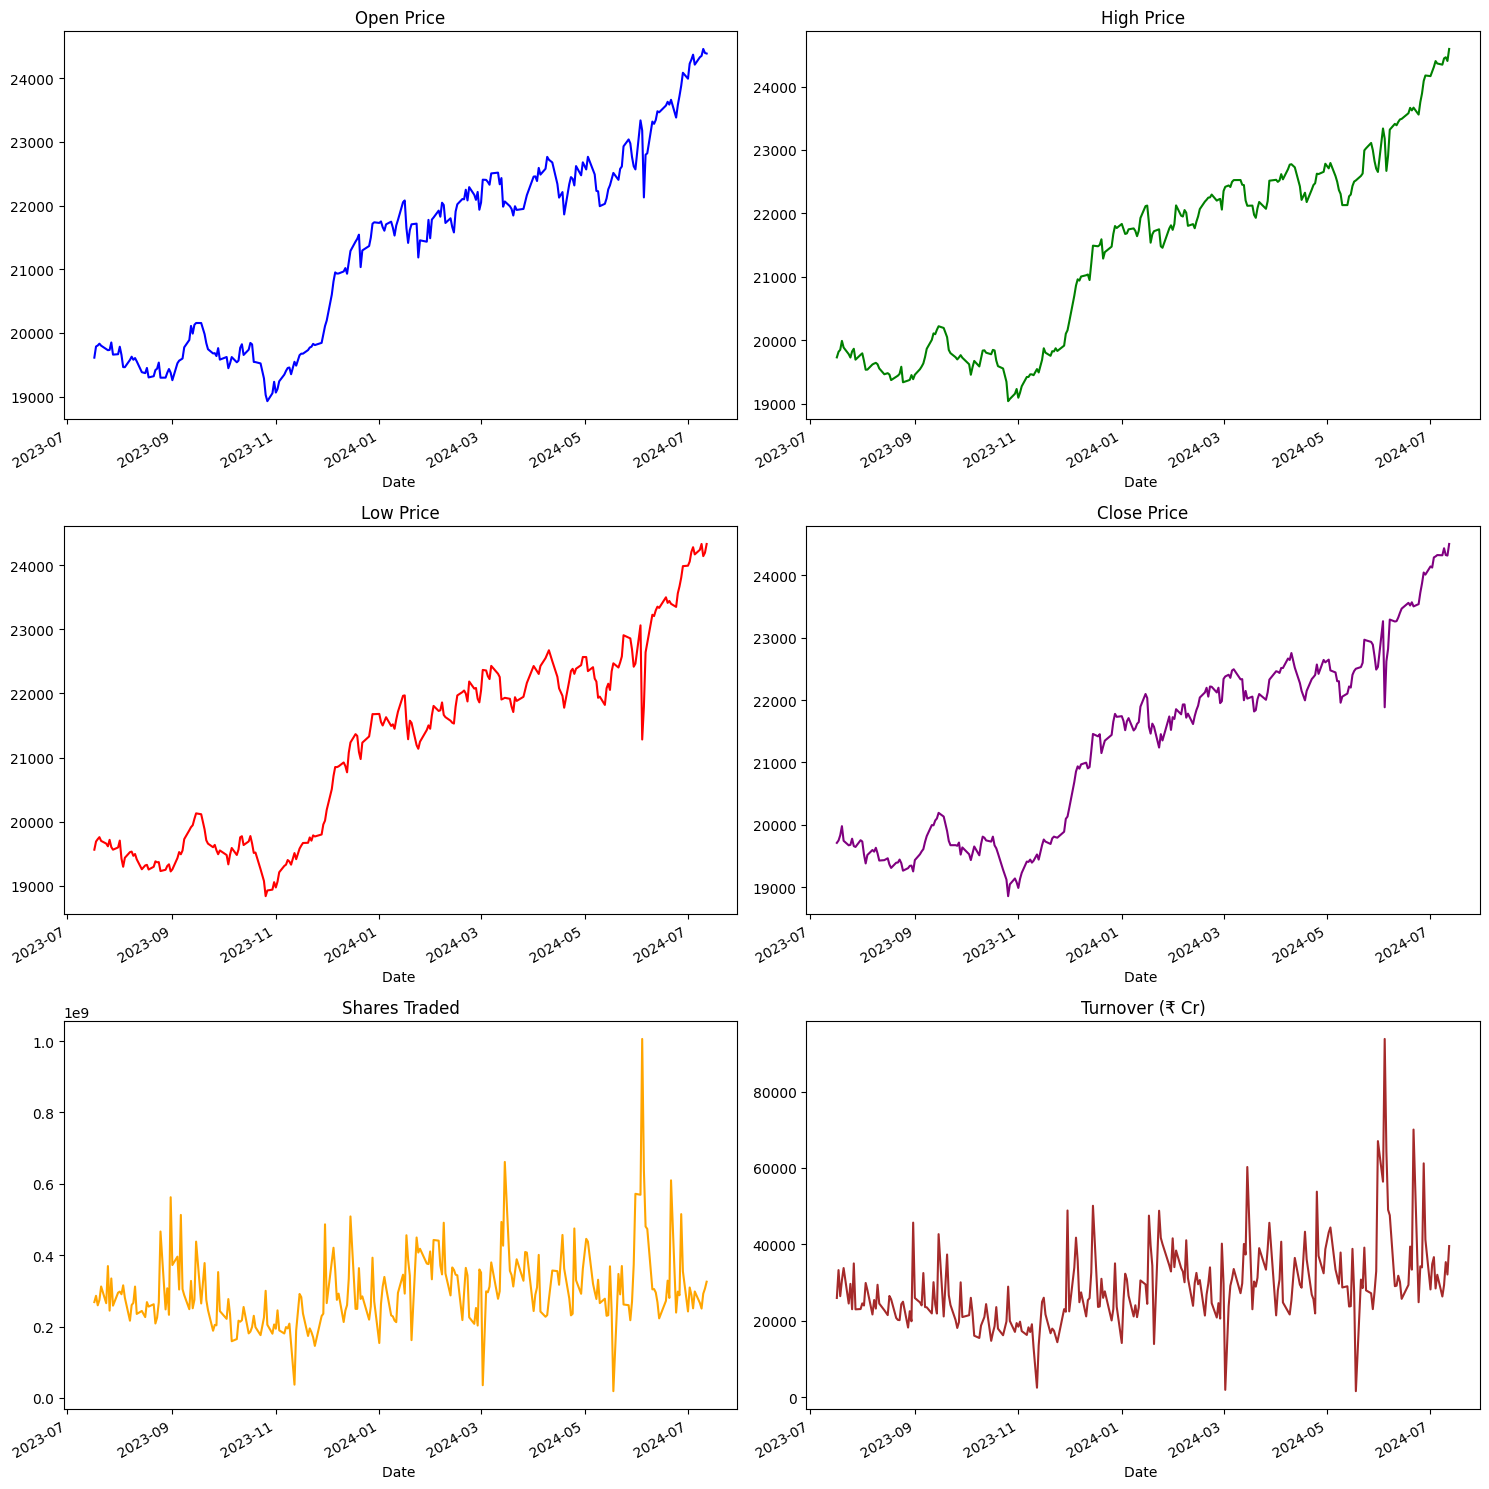

In [6]:
# Visualize the dataset using line charts
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
df['Open '].plot(ax=axes[0, 0], title='Open Price', color='blue')
df['High '].plot(ax=axes[0, 1], title='High Price', color='green')
df['Low '].plot(ax=axes[1, 0], title='Low Price', color='red')
df['Close '].plot(ax=axes[1, 1], title='Close Price', color='purple')
df['Shares Traded '].plot(ax=axes[2, 0], title='Shares Traded', color='orange')
df['Turnover (₹ Cr)'].plot(ax=axes[2, 1], title='Turnover (₹ Cr)', color='brown')
plt.tight_layout()
plt.show()

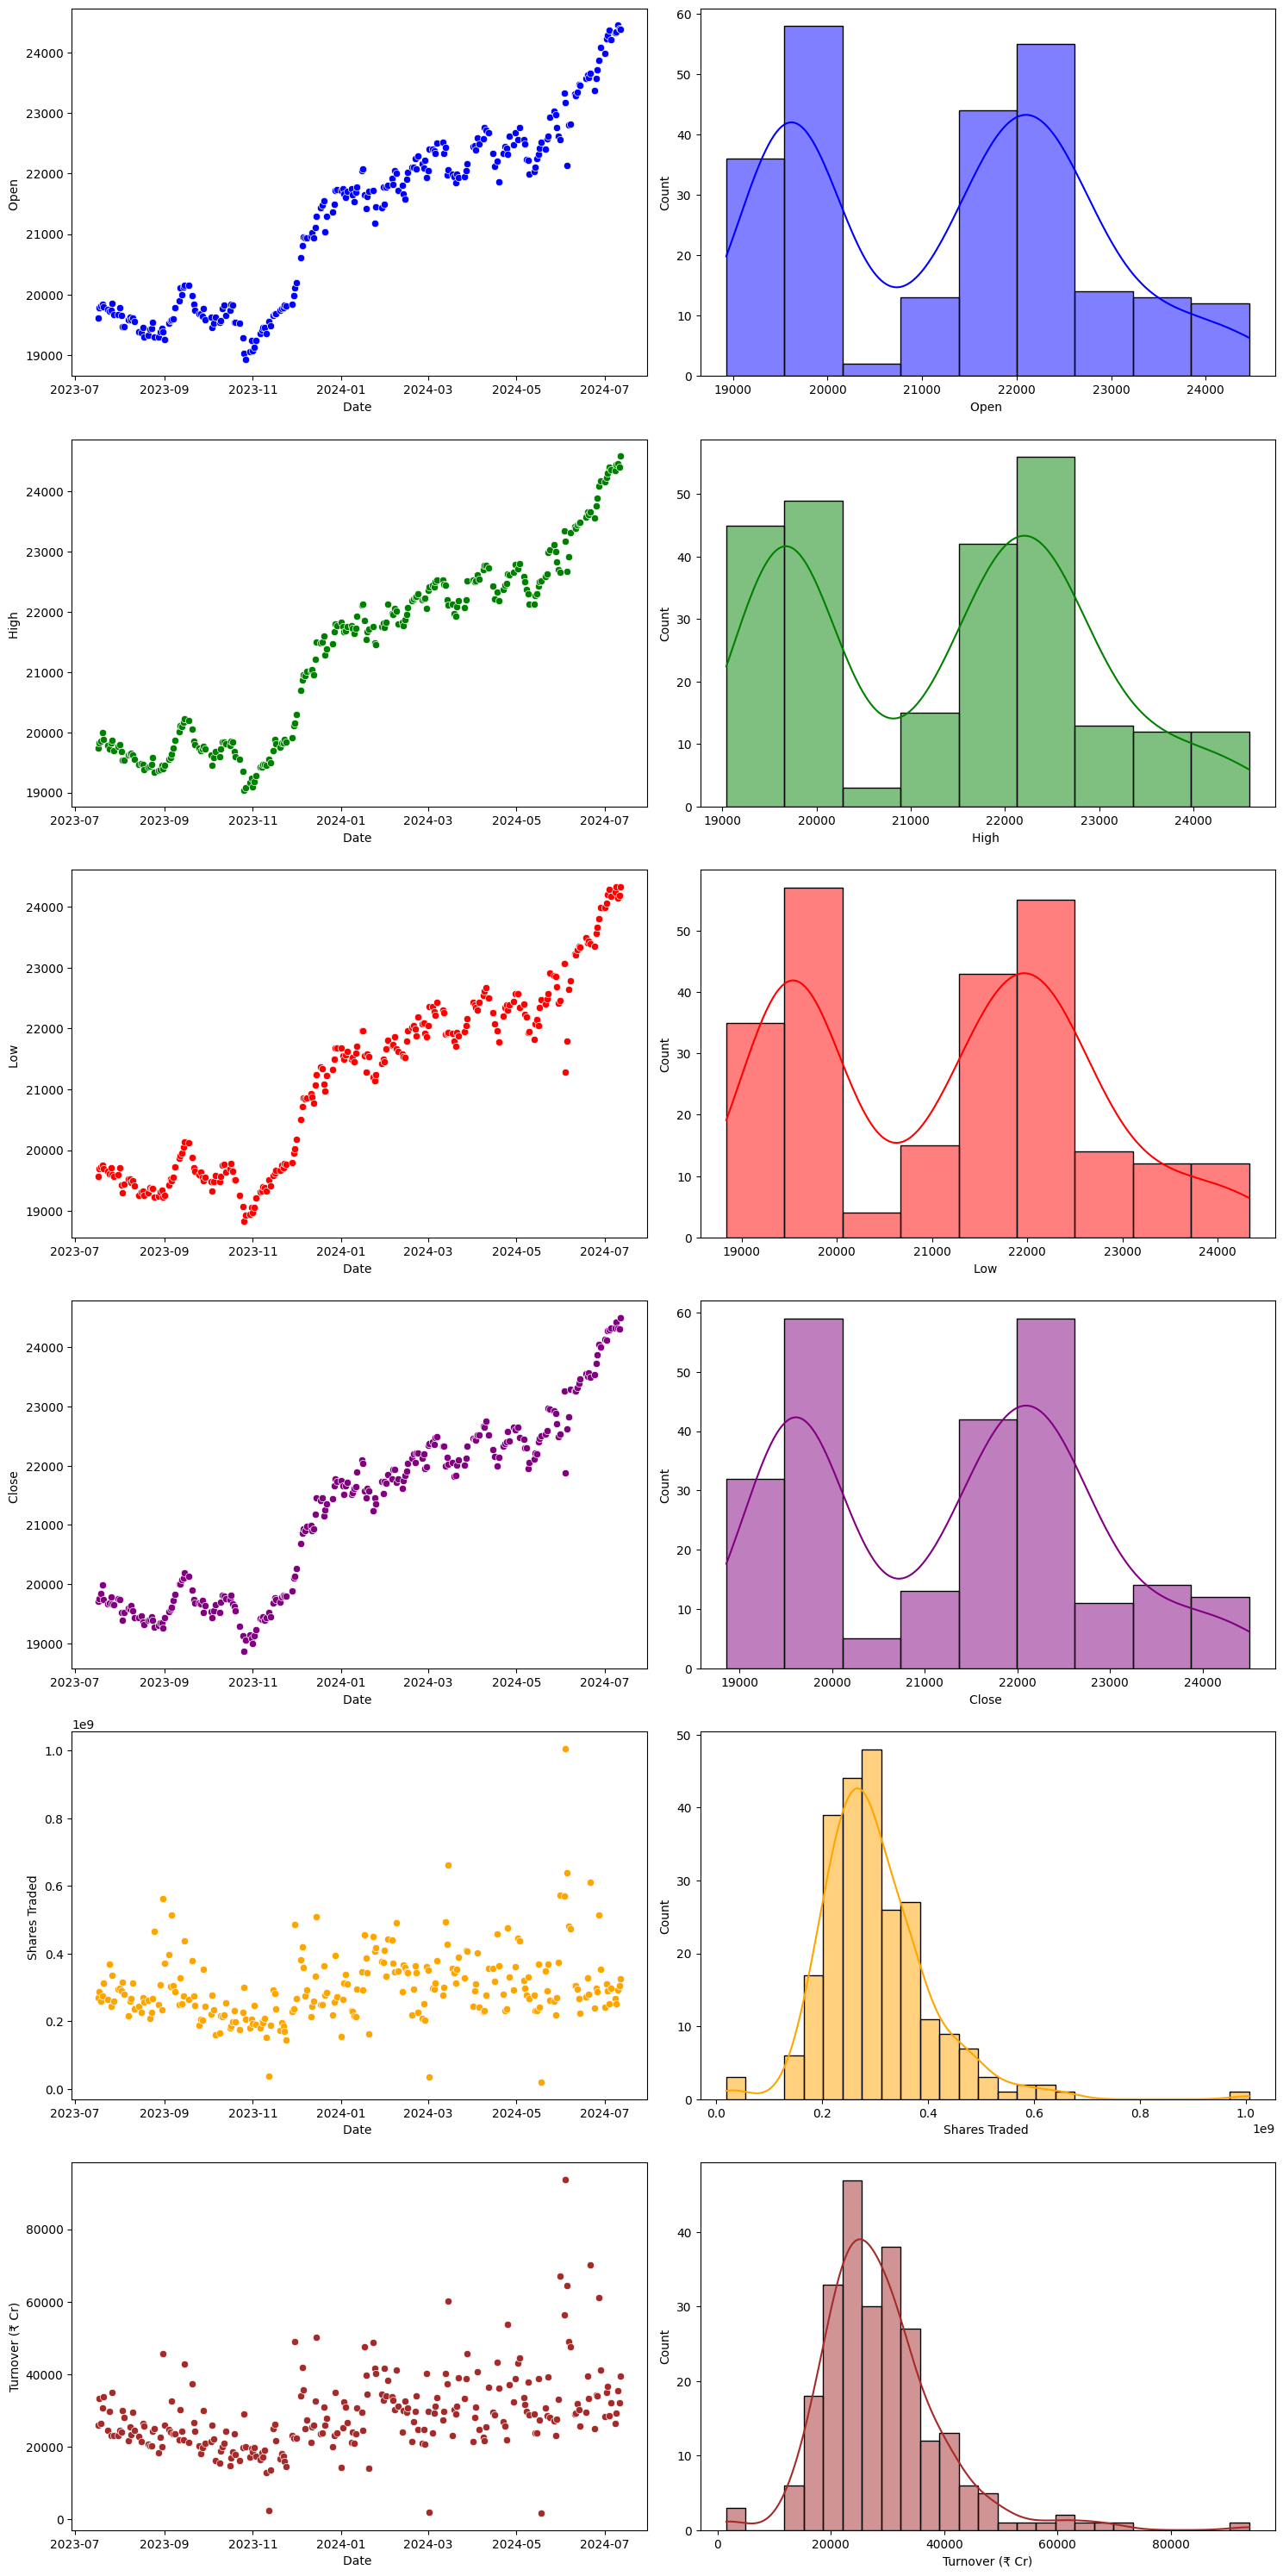

In [7]:
# Scatterplots and histograms
fig, axes = plt.subplots(6, 2, figsize=(15, 30))
sns.scatterplot(data=df, x=df.index, y='Open ', ax=axes[0, 0], color='blue')
sns.histplot(df['Open '], ax=axes[0, 1], kde=True, color='blue')
sns.scatterplot(data=df, x=df.index, y='High ', ax=axes[1, 0], color='green')
sns.histplot(df['High '], ax=axes[1, 1], kde=True, color='green')
sns.scatterplot(data=df, x=df.index, y='Low ', ax=axes[2, 0], color='red')
sns.histplot(df['Low '], ax=axes[2, 1], kde=True, color='red')
sns.scatterplot(data=df, x=df.index, y='Close ', ax=axes[3, 0], color='purple')
sns.histplot(df['Close '], ax=axes[3, 1], kde=True, color='purple')
sns.scatterplot(data=df, x=df.index, y='Shares Traded ', ax=axes[4, 0], color='orange')
sns.histplot(df['Shares Traded '], ax=axes[4, 1], kde=True, color='orange')
sns.scatterplot(data=df, x=df.index, y='Turnover (₹ Cr)', ax=axes[5, 0], color='brown')
sns.histplot(df['Turnover (₹ Cr)'], ax=axes[5, 1], kde=True, color='brown')
plt.tight_layout()
plt.show()


2. STATIONARITY CHECK

In [8]:
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

adf_test(df['Close '])

ADF Statistic: 0.46551576967952946
p-value: 0.983786419029752
Critical Values: {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}
Weak evidence against null hypothesis
Fail to reject the null hypothesis
Data is non-stationary


In [9]:
df['Close_diff'] = df['Close '].diff()
adf_test(df['Close_diff'].dropna())

ADF Statistic: -19.42228358142675
p-value: 0.0
Critical Values: {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary


3. MODEL SELECTION AND EVALUATION

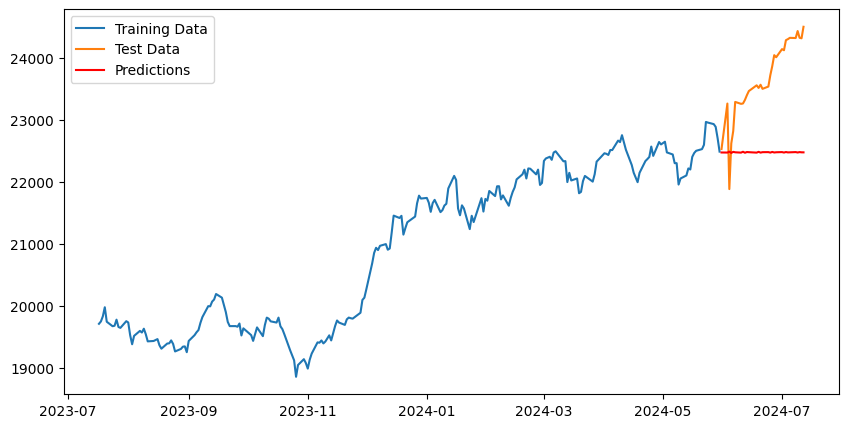

Mean Absolute Error: 1213.0151415440976
Root Mean Squared Error: 1329.4670282316124


In [10]:
# Split the data into training and test sets
train = df['Close '][:-30]
test = df['Close '][-30:]

# Fit an ARIMA model
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=30)
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.legend()
plt.show()

# Evaluate model performance
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)




Difference Between ARIMA and SARIMA Model<br>
ARIMA (AutoRegressive Integrated Moving Average) is used for non-seasonal time series data.<br>
SARIMA (Seasonal ARIMA) is used when there's a clear seasonal pattern in the data.<br>
<br>
We would prefer SARIMA when our data shows repeating patterns at fixed intervals.

4. FORECAST

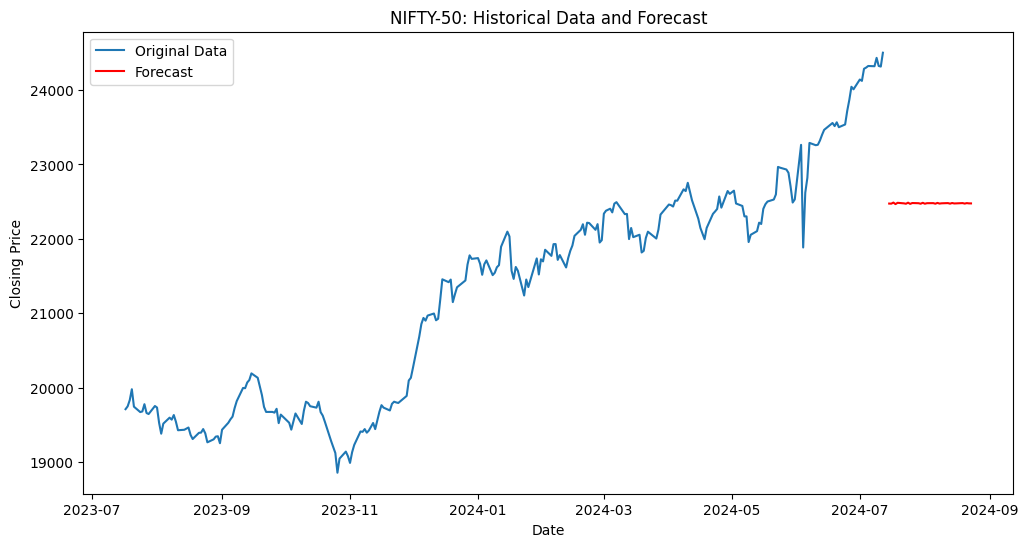

Forecasted NIFTY-50 Closing Prices for the Next Month:
            Forecasted_Close
Date                        
2024-07-15      22474.793713
2024-07-16      22473.506076
2024-07-17      22488.040828
2024-07-18      22467.543243
2024-07-19      22484.870408

Forecasted percentage change over the next month: -8.27%


In [12]:
# Forecast the stock price for the next month
forecast = model_fit.get_forecast(steps=30)
forecast_index = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
forecast_values = forecast.predicted_mean

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Date': forecast_index, 'Forecasted_Close': forecast_values})
forecast_df.set_index('Date', inplace=True)

# Plot the forecasted values and the original time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close '], label='Original Data')
plt.plot(forecast_df.index, forecast_df['Forecasted_Close'], label='Forecast', color='red')
plt.title('NIFTY-50: Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Print the forecasted values
print("Forecasted NIFTY-50 Closing Prices for the Next Month:")
print(forecast_df.head())

# Calculate and print the forecasted percentage change
last_actual_price = df['Close ' ].iloc[-1]
total_forecasted_change = (forecast_df['Forecasted_Close'].iloc[-1] - last_actual_price) / last_actual_price * 100

print(f"\nForecasted percentage change over the next month: {total_forecasted_change:.2f}%")


5. INTERPRETATION

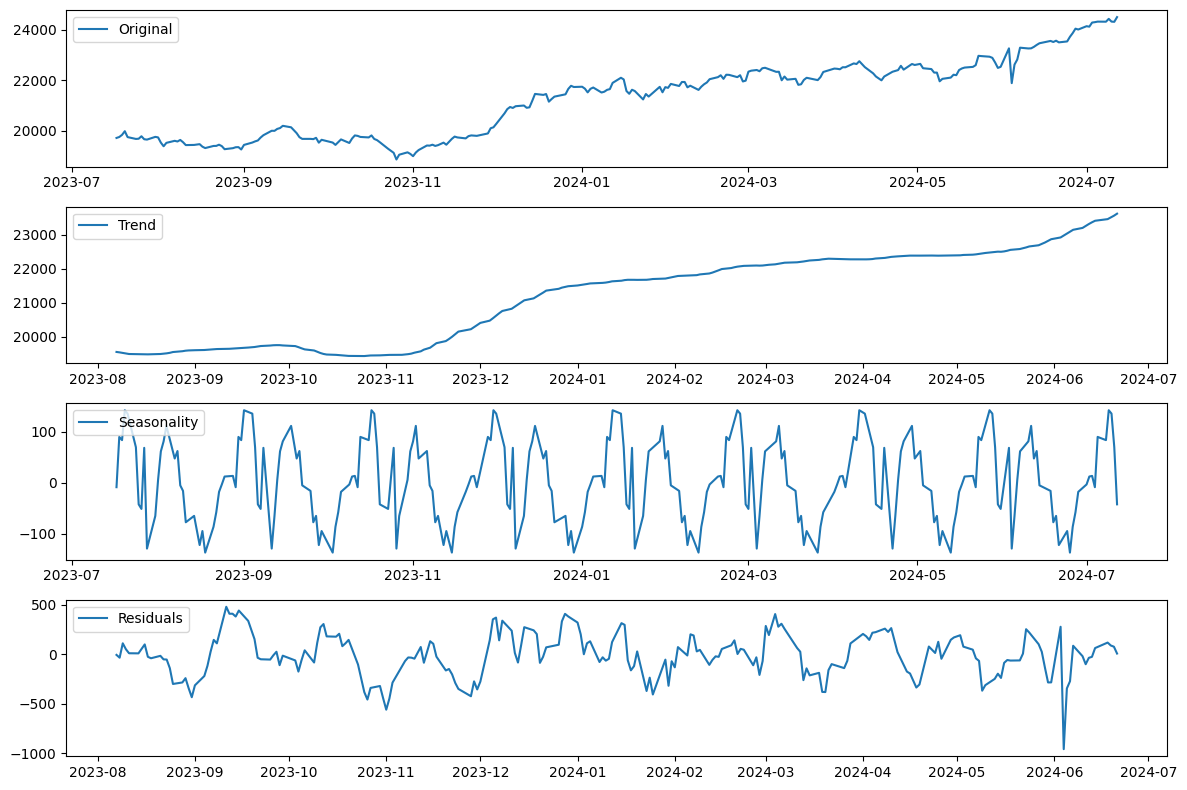

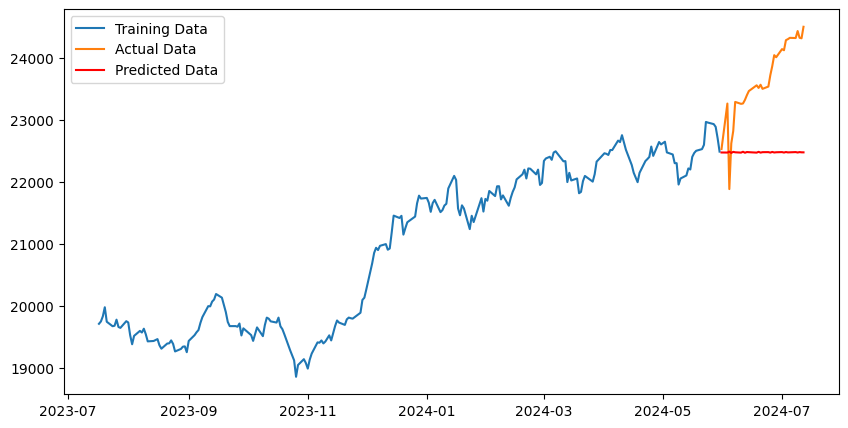

Mean Absolute Error (MAE): 1213.0151415440976
Root Mean Squared Error (RMSE): 1329.4670282316124
ADF Statistic (Residuals): -6.214944114755729
p-value (Residuals): 5.3942081048072525e-08
Critical Values (Residuals):
	1%: -3.462
	5%: -2.875
	10%: -2.574


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['Close '], model='additive', period=30)

# Extract and plot the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Close '], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Make predictions for the test set
predictions = model_fit.forecast(steps=30)

# Calculate performance metrics
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))


# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data')
plt.plot(test.index, predictions, label='Predicted Data', color='red')
plt.legend()
plt.show()


print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)
# Checking if residuals are stationary using ADF test
result_resid = adfuller(residual.dropna())
print('ADF Statistic (Residuals):', result_resid[0])
print('p-value (Residuals):', result_resid[1])
print('Critical Values (Residuals):')
for key, value in result_resid[4].items():
    print('\t%s: %.3f' % (key, value))
    




Interpretation:
- Trend: The trend component shows the long-term progression of the time series.
- Seasonality: The seasonal component captures the repeating short-term cycle in the series.
- Residuals: The residual component is what's left after removing the trend and seasonality. If the residuals are stationary, it indicates that the model has captured the trend and seasonality well.

Model Accuracy:
   - Mean Absolute Error (MAE): 1213.015
   - Root Mean Squared Error (RMSE): 1329.467

Visual Comparison:
   - The plot shows actual vs predicted values. A close alignment indicates good predictive performance.

Stationarity Check:
- The ADF test on residuals helps to verify if the residuals are stationary. If the residuals are stationary (p-value < 0.05), it means the model has effectively captured the trend and seasonality.

Residual Analysis:
   - The ADF test on residuals shows:
     - ADF Statistic: -6.215
     - p-value: 5.3942081048072525e-08
     - If the p-value is less than 0.05, the residuals are stationary, indicating that the model has captured the trend and seasonality effectively.

Conclusion:
- The model forecasts future stock prices reasonably well if the MAE and RMSE are low, the predicted values closely follow the actual values, and the residuals are randomly distributed and stationary.
